<h1>IMPORTING NECESSARY LIBRARY FOR PROJECT</h1>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

<h1> GENERATING DATA SET FOR ANALYSIS </h1>

In [8]:
data ={
    'Date':pd.date_range('2025-03-06',periods=100),
    'Platform':np.random.choice(['Facebook','instagram','Twitter','Snapchat','youtube','tik tok'],100),
    'Timespent':np.random.randint(1,180,100) # time in minutes 
}

df=pd.DataFrame(data)
df
# we have taken maximum timespent as three hours

,Date,Platform,Timespent
0,2025-03-06,tik tok,112
1,2025-03-07,instagram,4
2,2025-03-08,youtube,160
3,2025-03-09,youtube,33
4,2025-03-10,instagram,107
...,...,...,...
95,2025-06-09,tik tok,160
96,2025-06-10,instagram,169
97,2025-06-11,youtube,156
98,2025-06-12,Twitter,64


<h2>DATA EXPLORATION</h2>

In [10]:
print('first few rows of our data set')
df.head()

first few rows of our data set


,Date,Platform,Timespent
0,2025-03-06,tik tok,112
1,2025-03-07,instagram,4
2,2025-03-08,youtube,160
3,2025-03-09,youtube,33
4,2025-03-10,instagram,107


In [11]:
print('info of the DataFrame')
df.info()

info of the DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       100 non-null    datetime64[ns]
 1   Platform   100 non-null    object        
 2   Timespent  100 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 2.1+ KB


In [13]:
print('check if there is any null value or not')
df.isnull().sum()

check if there is any null value or not


Date         0
Platform     0
Timespent    0
dtype: int64

In [14]:
print('describing the numerical columns')
df.describe()

describing the numerical columns


,Date,Timespent
count,100,100.00000
mean,2025-04-24 12:00:00,96.05000
min,2025-03-06 00:00:00,1.00000
25%,2025-03-30 18:00:00,60.25000
50%,2025-04-24 12:00:00,97.00000
75%,2025-05-19 06:00:00,144.00000
max,2025-06-13 00:00:00,178.00000
std,NaN,51.74986


<h2>Data Aggregation and Visualization</h2>

In [16]:
# Calculate total time spent per platform 

platform_time = df.groupby('Platform')['Timespent'].sum().reset_index()
platform_time

,Platform,Timespent
0,Facebook,1494
1,Snapchat,1425
2,Twitter,1402
3,instagram,1795
4,tik tok,1475
5,youtube,2014


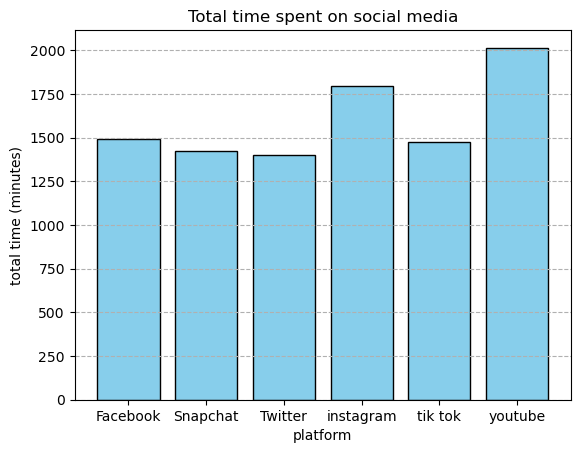

In [22]:
plt.bar(platform_time['Platform'], platform_time['Timespent'], color='skyblue',edgecolor='black')
plt.title('Total time spent on social media')
plt.xlabel('platform')
plt.ylabel('total time (minutes)')
plt.grid(axis='y',linestyle='--')
plt.show()

In [27]:
# analysis youtube usage overtime

yt_data =df[df['Platform']=='youtube']
yt_data

,Date,Platform,Timespent
2,2025-03-08,youtube,160
3,2025-03-09,youtube,33
11,2025-03-17,youtube,122
13,2025-03-19,youtube,171
19,2025-03-25,youtube,144
23,2025-03-29,youtube,63
24,2025-03-30,youtube,175
39,2025-04-14,youtube,95
55,2025-04-30,youtube,20
57,2025-05-02,youtube,57


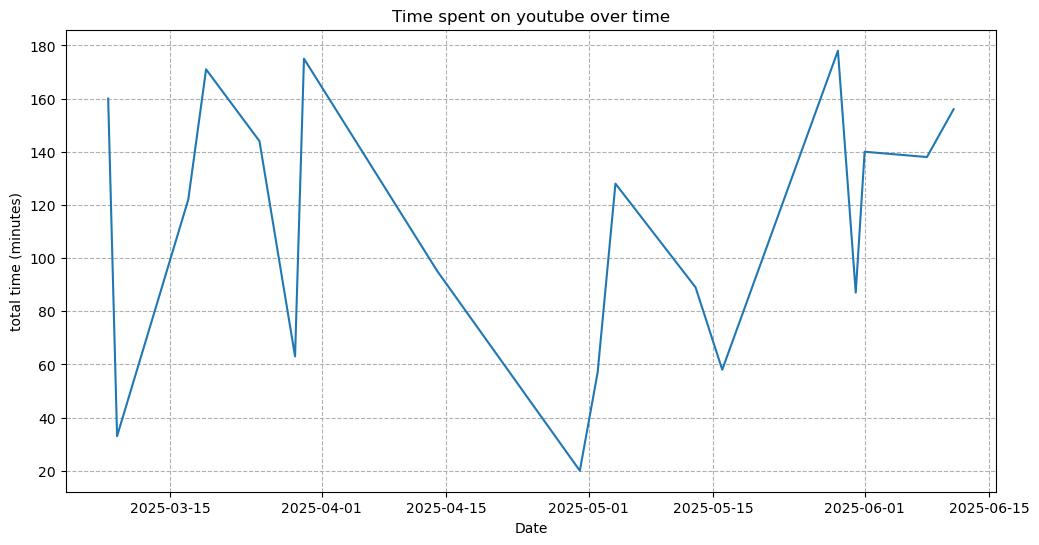

In [29]:
plt.figure(figsize=(12,6))
plt.plot(yt_data['Date'],yt_data['Timespent'])
plt.title('Time spent on youtube over time')
plt.xlabel('Date')
plt.ylabel('total time (minutes)')
plt.grid(True,linestyle='--')
plt.show()

In [30]:
# Average time spent per Platform 
avg_time = df.groupby('Platform')['Timespent'].mean()
avg_time

Platform
Facebook     124.500000
Snapchat      89.062500
Twitter       82.470588
instagram     81.590909
tik tok       98.333333
youtube      111.888889
Name: Timespent, dtype: float64

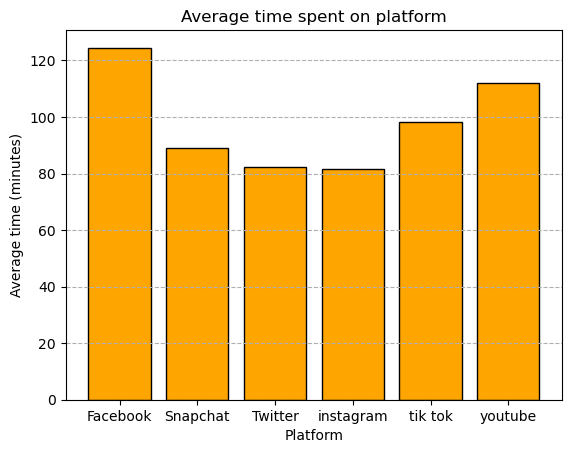

In [36]:
plt.bar(avg_time.index,avg_time.values,color='orange',edgecolor='black')
plt.title('Average time spent on platform')
plt.xlabel('Platform')
plt.ylabel('Average time (minutes)')
plt.grid(axis='y',linestyle='--')
plt.show()

In [38]:
# percentage share of time per platform
platform_time = df.groupby('Platform')['Timespent'].sum().reset_index()
print(platform_time)

    Platform  Timespent
0   Facebook       1494
1   Snapchat       1425
2    Twitter       1402
3  instagram       1795
4    tik tok       1475
5    youtube       2014


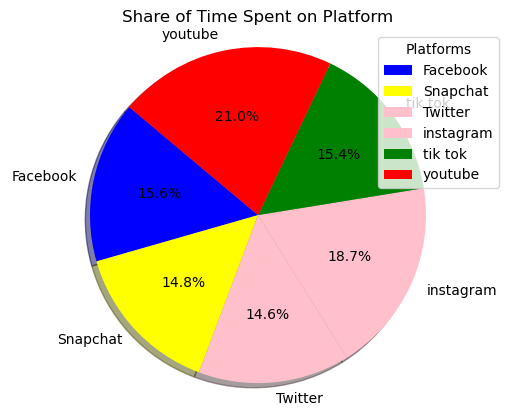

In [47]:
color = ['blue','yellow','pink','pink','green','red']
plt.pie(platform_time['Timespent'],labels=platform_time['Platform'],shadow=True,autopct='%1.1f%%',
    startangle=140,colors=color
)
plt.title('Share of Time Spent on Platform')
plt.axis('equal')  # Make it a circle
plt.legend(title='Platforms')
plt.show()


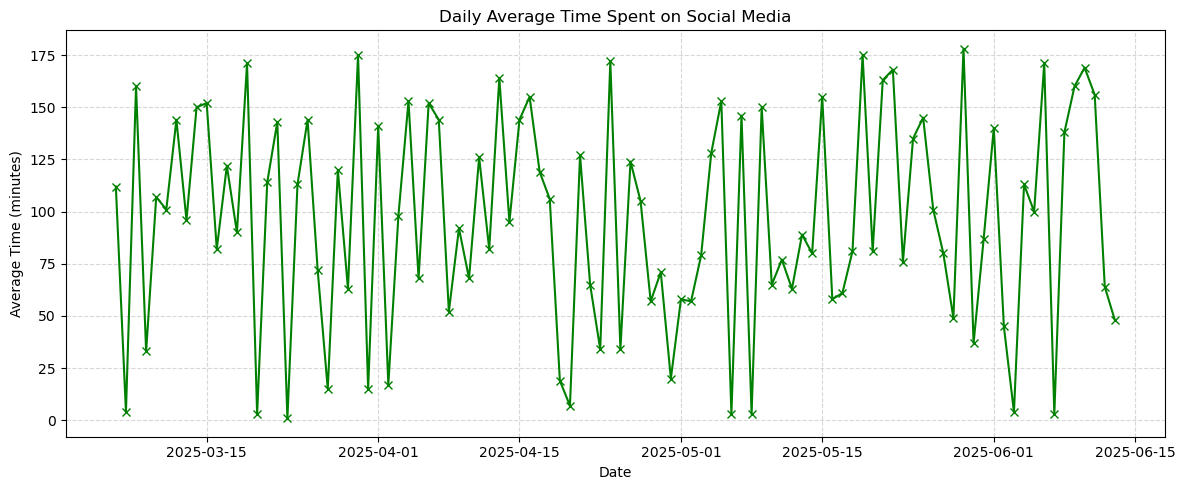

In [43]:
daily_avg = df.groupby('Date')['Timespent'].mean()

plt.figure(figsize=(12, 5))
plt.plot(daily_avg.index, daily_avg.values, marker='x', linestyle='-', color='green')
plt.title('Daily Average Time Spent on Social Media')
plt.xlabel('Date')
plt.ylabel('Average Time (minutes)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()